In [48]:
# import the libraries
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer

# import warnings
# warnings.filterwarnings('ignore')

In [32]:
# read the dataset
df = pd.read_csv("./data/CEE_DATA.csv")

In [34]:
X = df[['Gender', 'Caste', 'coaching', 'time',
       'Class_ten_education', 'twelve_education', 'medium',
       'Class_X_Percentage', 'Class_XII_Percentage', 'Father_occupation',
       'Mother_occupation']]
Y = df[['Performance']]

In [4]:
# Descriptive report on the dataset
profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_file("profiling_report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 103.97it/s]


## Train a model with one-hot encoding and label encoding

In [37]:
ode1 = OrdinalEncoder(categories=[["'Average'","'Good'","'Vg'", "'Excellent'"]])
ode2 = OrdinalEncoder(categories=[["'female'","'male'"]])
ohe = OneHotEncoder(sparse=False)

In [44]:
# column_transform = make_column_transformer(
#     (ohe,['Caste', 'coaching', 'time','Class_ten_education', 'twelve_education', 'medium', 'Father_occupation','Mother_occupation']),
#     (ode1,['Class_X_Percentage']),
#     (ode1,['Class_XII_Percentage']),
#     (ode2,['Gender'])
# )
# X_transformed = column_transform.fit_transform(X)

X_transformed = pd.DataFrame(ohe.fit_transform(X[['Caste', 'coaching', 'time','Class_ten_education', 'twelve_education', 'medium', 'Father_occupation','Mother_occupation']]),
                    columns=ohe.get_feature_names(['Caste', 'coaching', 'time','Class_ten_education', 'twelve_education', 'medium', 'Father_occupation','Mother_occupation']))
X_transformed['Class_X_Percentage'] = ode1.fit_transform(X[['Class_X_Percentage']])
X_transformed['Class_XII_Percentage'] = ode1.fit_transform(X[['Class_XII_Percentage']])
X_transformed['Gender'] = ode2.fit_transform(X[['Gender']])

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X_transformed, Y, test_size=0.3, random_state=1)
print("Train Size Instances: ", X_train.shape[0])
print("Test Size Instances:", X_test.shape[0])
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print("Accuracy: ", metrics.accuracy_score(Y_test, Y_pred))

Train Size Instances:  466
Test Size Instances: 200
Accuracy:  0.525


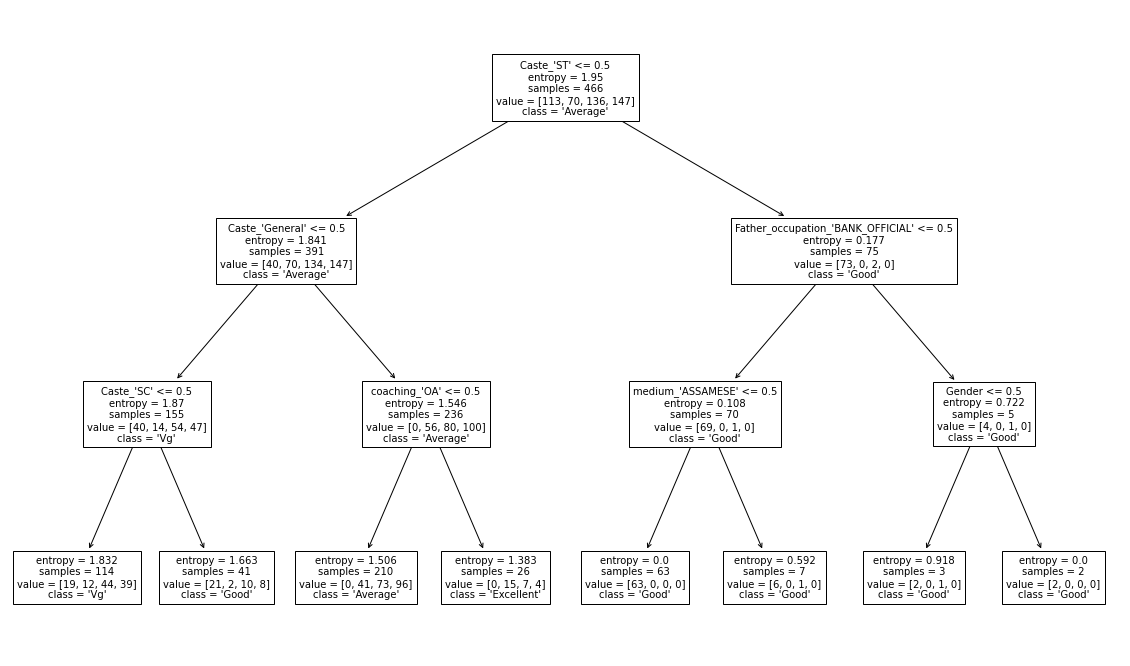

In [49]:
plt.figure(figsize=(20,12))
tree.plot_tree(clf, fontsize=10, feature_names=list(X_transformed.columns), class_names=list(set(Y.values.reshape(-1,))))
plt.show()

## Train a model with one-hot encoding (get_dummies)

In [50]:
X = pd.get_dummies(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
print("Train Size Instances: ", X_train.shape[0])
print("Test Size Instances:", X_test.shape[0])
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print("Accuracy: ", metrics.accuracy_score(Y_test, Y_pred))

Train Size Instances:  466
Test Size Instances: 200
Accuracy:  0.525


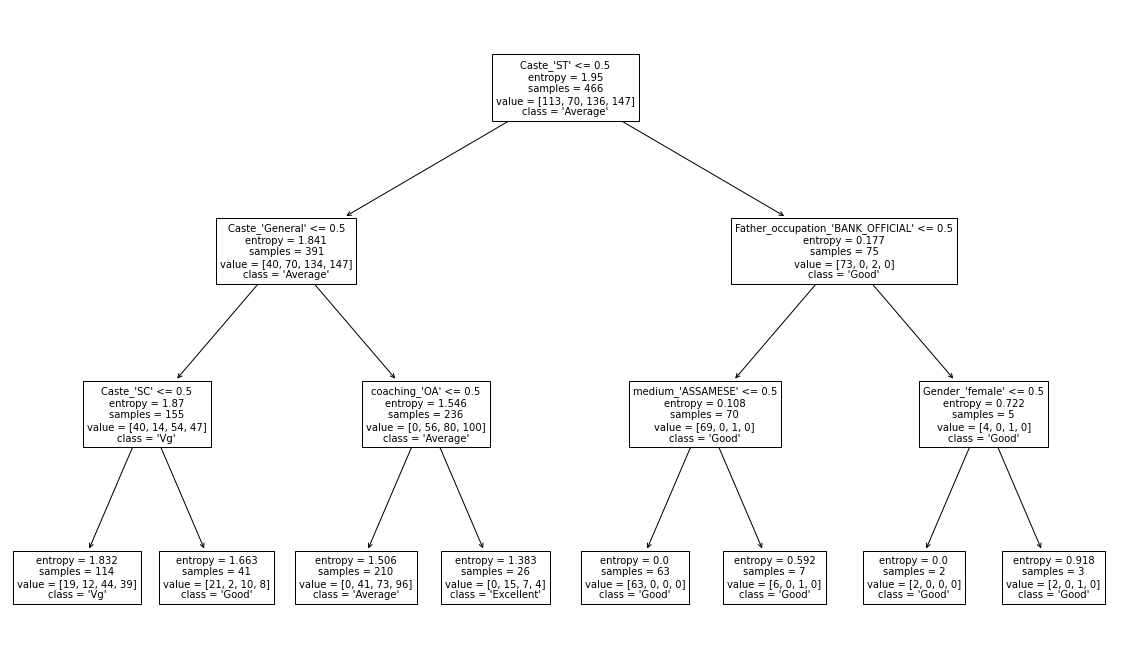

In [51]:
plt.figure(figsize=(20,12))
tree.plot_tree(clf, fontsize=10, feature_names=list(X.columns), class_names=list(set(Y.values.reshape(-1,))))
plt.show()